<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/Hackerearth_cogito_AI_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

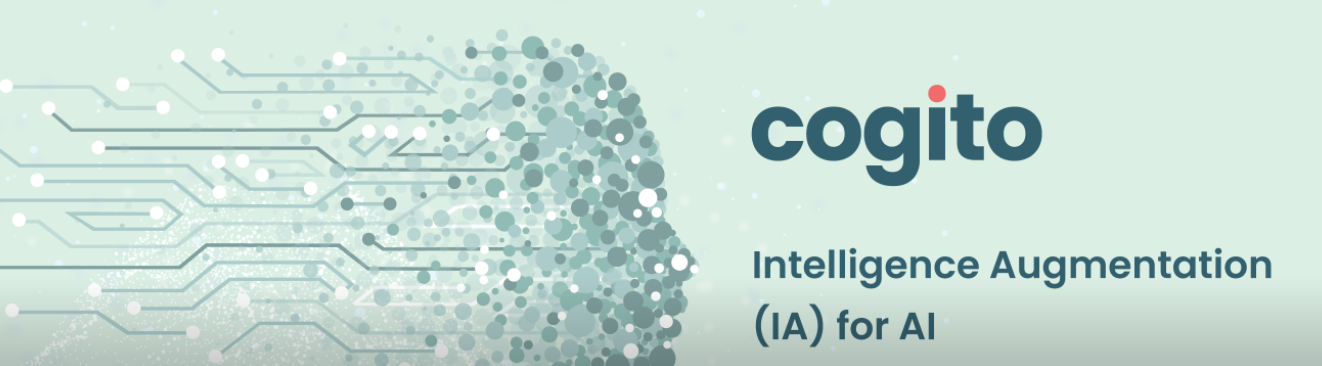

## Predict the emotions

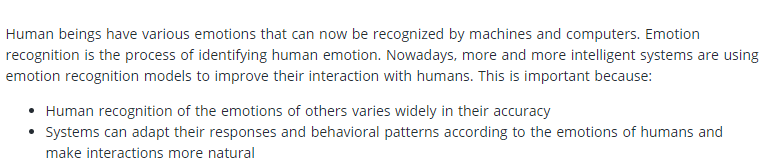

#### Tasks
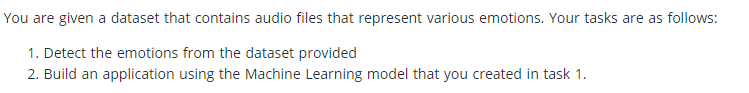


#### Dataset description
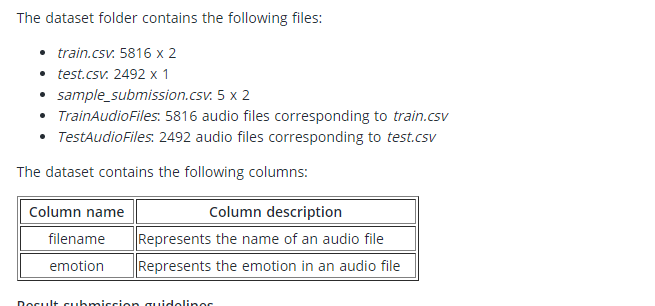


#### Result
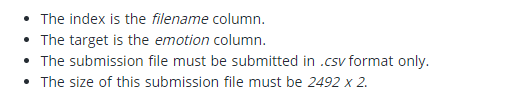



https://towardsdatascience.com/easy-speech-to-text-with-python-3df0d973b426

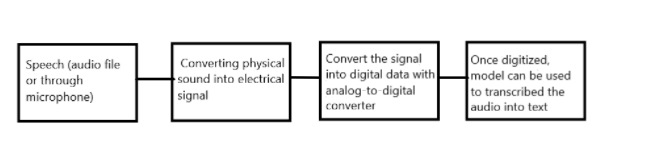

In [ ]:
from google.colab import files
files.upload()

Saving dbb3bd26ead211eb.zip to dbb3bd26ead211eb.zip


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Unzip file and save in google drive

In [ ]:
%%capture
!unzip "/content/dbb3bd26ead211eb.zip" -d "/content/drive/MyDrive/Machine_Hack"

## Import data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Machine_Hack/dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Machine_Hack/dataset/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Machine_Hack/dataset/sample_submission.csv")

In [4]:
train.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [6]:
train[train['emotion'] =='joy'].tail()

,filename,emotion
5782,12361.mp3,joy
5788,4724.mp3,joy
5800,17036.mp3,joy
5808,13293.mp3,joy
5810,29498.mp3,joy


In [3]:
!pip3 install SpeechRecognition 

In [9]:
!pip install pydub

In [10]:
!pip install simpleaudio

     |████████████████████████████████| 2.0 MB 7.9 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065966 sha256=2c614b3764d7107a15ef3794270659ea235979c85b28162662de891971446e4f
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio


In [11]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [5]:
import os
from os import path
from pydub import AudioSegment
import speech_recognition as sr
print(sr.__version__)

def mp3_wav_text(filepath,filename):
  #files                                                                         
  src = os.path.join(filepath,filename)
  dst = "test1.wav"

  # convert wav to mp3                                                            
  sound = AudioSegment.from_mp3(src)
  sound.export(dst, format="wav")
  #
  r = sr.Recognizer()
  #
  file_audio = sr.AudioFile('/content/test1.wav')
  #
  with file_audio as source:
    audio_text = r.record(source)

  #print(type(audio_text))
  #print(r.recognize_google(audio_text))
  return r.recognize_google(audio_text)

3.8.1


In [ ]:
file2 = "/content/drive/MyDrive/Machine_Hack/dataset/TrainAudioFiles/41901.wav"

In [ ]:
import IPython
IPython.display.Audio('/content/test1.wav')

In [ ]:
IPython.display.Audio(file2)

In [5]:
train_audio = train['filename'].values.tolist()
test_audio =  test['filename'].values.tolist()

In [6]:
from tqdm import tqdm
train_text = []
test_text = []
train_path = '/content/drive/MyDrive/Machine_Hack/dataset/TrainAudioFiles'
test_path = '/content/drive/MyDrive/Machine_Hack/dataset/TestAudioFiles'
for audio in tqdm(train_audio):
  try :
    train_text.append(mp3_wav_text(train_path,audio))
  except:
    train_text.append('Error')


100%|██████████| 5816/5816 [52:57<00:00,  1.83it/s]


In [7]:
test_text = []
for audio in tqdm(test_audio):
  try :
    test_text.append(mp3_wav_text(test_path,audio))
  except:
    test_text.append('Error')

100%|██████████| 2492/2492 [34:12<00:00,  1.21it/s]


In [8]:
train['text'] = train_text
test['text'] = test_text

In [9]:
train.head()

,filename,emotion,text
0,18777.mp3,neutral,did you find anyone to marry
1,24041.mp3,neutral,school is infection
2,1621.mp3,joy,Error
3,28883.mp3,neutral,Error
4,14918.mp3,neutral,let's try I look


In [11]:
train[train['text'] =='Error'].shape[0]/train.shape[0]

0.22936726272352131

In [12]:
test[test['text'] =='Error'].shape[0]/test.shape[0]

0.2247191011235955

In [6]:
train_path = '/content/drive/MyDrive/Machine_Hack/dataset/TrainAudioFiles'
test_path = '/content/drive/MyDrive/Machine_Hack/dataset/TestAudioFiles'
src = os.path.join(test_path,'16821.mp3')
dst = "test1.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='test1.wav'>

In [7]:
import IPython
IPython.display.Audio('/content/test1.wav')

In [9]:
import speech_recognition as sr
print(sr.__version__)
r = sr.Recognizer()

file_audio = sr.AudioFile('/content/test1.wav')

with file_audio as source:
   audio_text = r.record(source)

print(type(audio_text))
print(r.recognize_google(audio_text))

3.8.1
<class 'speech_recognition.AudioData'>


UnknownValueError: ignored

In [10]:
test.head()

,filename,text
0,26199.mp3,yeah
1,692.mp3,no you're not you're wondering which cushion i...
2,16821.mp3,Error
3,1608.mp3,Error
4,47947.wav,don't forget a jacket
